
---

# 🎓 Capstone Project: Fraudulent Transaction Detection

---

## 📌 Program Details
- **Program:** Post Graduate Program (PGP) in Artificial Intelligence & Machine Learning  
- **Institution:** IIIT Bangalore  
- **Project Type:** Capstone Project  
- **Date:** November 2025  

---

## 🧠 Project Details
- **Title:** Fraudulent Transaction Detection using Machine Learning  
- **Objective:** Build and evaluate machine learning models to detect fraudulent transactions with high accuracy and robustness.  
- **Techniques Used:**  
  - Hyperparameter Tuning (HPT)  
  - Resampling Methods: SMOTE, ADASYN, Random Oversampling (ROS)  
- **Models Evaluated:**  
  - KNN, Logistic Regression, Decision Tree, Random Forest, XGBoost  
- **Evaluation Metrics:** Precision, Recall, PR-AUC, ROC-AUC, Execution Time  
- **Key Outcome:**  
  - Best Performing Model: **XGBoost with HPT** (High precision, strong recall, excellent PR-AUC, minimal execution time)  

---

### 👤 Author Details
- **Name:** Rajiv Gaba
- **Email:** rajiv.eml69@iiitb.net
- **GitHub:** https://github.com/rajivgaba

---


## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_score, recall_score, roc_auc_score, roc_curve


## Exploratory data analysis

In [92]:
# Load the csv file into a pandas dataframe

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [94]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

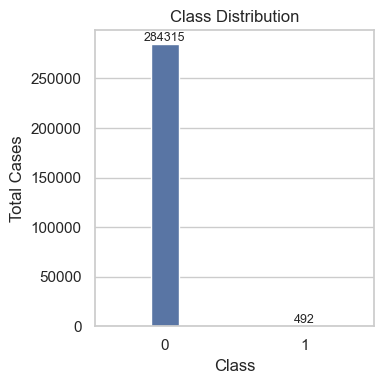

In [95]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Class', data=df, width=0.2)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.1, p.get_height() + 1, ), fontsize=9, rotation = 0, ha="center" , va="bottom")
# plt.xticks((0, 1), ('Normal', 'Fraud'))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


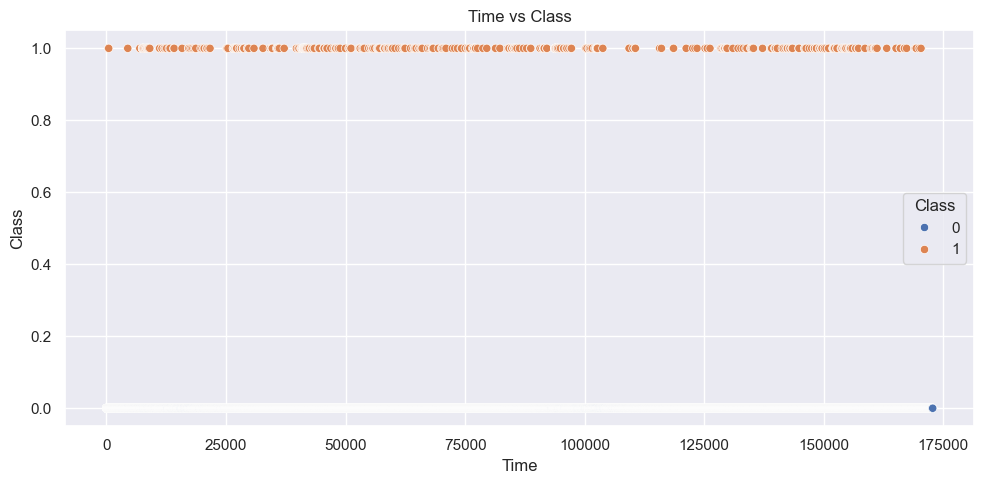

In [96]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.scatterplot(x='Time', y='Class', data=df, hue='Class')
plt.title('Time vs Class')
plt.tight_layout()
plt.show()


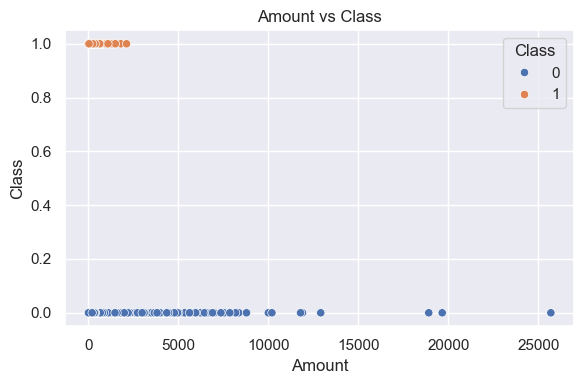

In [97]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
sns.scatterplot(x='Amount', y='Class', data=df, hue='Class')
plt.title('Amount vs Class')
plt.tight_layout()
plt.show()

#### Observation

From the above visualizations we can see that

- *Time* variable doesnt play any role in detection of fraudulant transactions. 
- Fraud transactions are usually of smaller transaction amounts

In [98]:
# Drop unnecessary columns: Time appears to be a redundant column in the dataset and doesnt affect the model variables. Hence, we would remove it.

df = df.drop(['Time'], axis=1)

### Splitting the data into train & test data

In [99]:
# pop out target variable into y 
y= df.pop('Class')

In [100]:
# Split the data into training and testing to the tune of 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
RANDOM_STATE=42

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [101]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

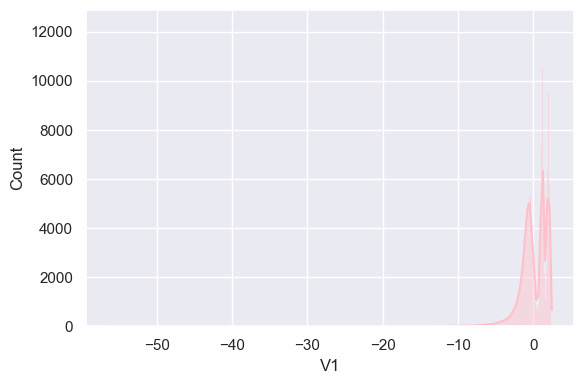

In [102]:
# plot the histogram of a variable from the dataset to see the skewness

for col_name in X_train.columns[0:1]:
    plt.figure(figsize=(6,4))
    sns.set_theme(style="darkgrid")
    sns.histplot(X_train[col_name], kde=True, color='pink')
    plt.tight_layout()
    plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [103]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt.fit_transform(X_train)

In [104]:
data_transformed[0][1]

np.float64(-0.32549737862979433)

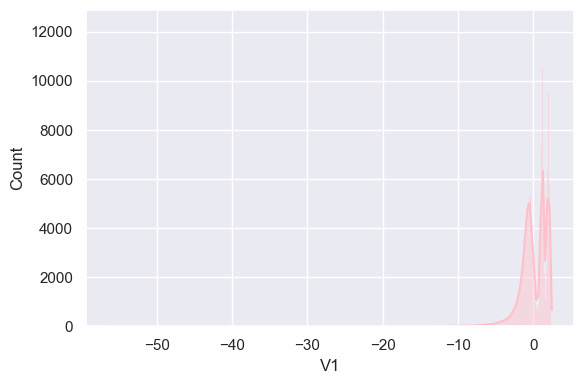

In [105]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness

for col_name in X_train.columns[0:1]:
    plt.figure(figsize=(6,4))
    sns.set_theme(style="darkgrid")
    sns.histplot(X_train[col_name], kde=True, color='pink')
    plt.tight_layout()
    plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

- Since we will be working on building different models, we shall capture the important metrics and parameters into a pandas dataframe for subsequent use. 

In [106]:
# Create a dataframe that can hold metrics and parameters

metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'PR-AUC', 'ROC-AUC', 'Time Taken(s)','Parameters'])

# create a reusable function to capture the performance metrics along with parameters for each model

def capture_model_performance_metrics(metrics_df, name, precision, recall, pr_auc_score, roc_auc_score, timetaken, params):
    # emit the metrics into dataframe
    mdf = pd.concat(
        [metrics_df,
        pd.DataFrame(
            {
                'Model' : [name],
                'Precision': [precision],
                'Recall': [recall],
                'PR-AUC': [pr_auc_score],
                'ROC-AUC' : [roc_auc_score],
                'Time Taken(s)': [timetaken],
                'Parameters': [params]
            }
        )
        ],
        ignore_index=True
    )
    return mdf

In [107]:
# Logistic Regression
num_C = 0.001
cv_num = 5

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [108]:
# Perform cross validation

params = {'C': num_C, 'class_weight': 'balanced'}
clf = LogisticRegression(C=num_C, class_weight='balanced', random_state=RANDOM_STATE)
cv = model_selection.StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=42)
start_time = time.time()
cv_results = model_selection.cross_validate(clf, data_transformed, y_train, cv=cv, scoring=['precision', 'recall', 'average_precision','roc_auc'])
timetaken = time.time() - start_time

print(f"Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f}")
print(f"PRAUC Score: {cv_results['test_average_precision'].mean():.4f}")
print(f"ROCAUC Score: {cv_results['test_roc_auc'].mean()}")

Precision: 0.0713
Recall: 0.9062
PRAUC Score: 0.7481
ROCAUC Score: 0.9784261684514988


In [109]:
# capture the metrics of LR model

metrics_df = pd.concat([metrics_df, capture_model_performance_metrics(metrics_df, 'KNN with HPT', cv_results['test_precision'].mean(), cv_results['test_recall'].mean(), cv_results['test_average_precision'].mean(),cv_results['test_roc_auc'].mean(),  timetaken, params)], ignore_index=True)

In [110]:
#perform hyperparameter tuning

start_time = time.time()
name = 'LogisticRegression with HPT'
param_grid = [
    {'penalty':['l1','l2'],
    'C' : np.logspace(-1,1,5),
    'solver': ['lbfgs','newton-cg','liblinear'],
    'max_iter'  : [100,1000,2500,5000]
}
]

# Instantiate LR mode
lr = LogisticRegression(random_state=RANDOM_STATE)

# Instantiate grid search class for parameter tuning
gcv = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit the model and get the best model
best_gcv = gcv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

print(f"Best Parameters: {best_gcv.best_params_}, Best Score: {best_gcv.best_score_}")

# make prediction on test data and check accuracy score on test data

y_pred = best_gcv.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
pr_auc_score = average_precision_score(y_test, y_pred)
roc_auc_sc = roc_auc_score(y_test, y_pred)

timetaken = time.time() - start_time

# emit the metrics into dataframe
metrics_df = capture_model_performance_metrics(
    metrics_df, 
    name, 
    precision, 
    recall, 
    pr_auc_score,
    roc_auc_sc ,
    timetaken, 
    param_grid
)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Parameters: {'C': np.float64(10.0), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}, Best Score: 0.9992407119644892


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [111]:
# define a function to train a model. capture performance metrics and time taken

def base_model_trainer(X_train, y_train, X_test, y_test, clf, name):
    # Start the time
    start_time = time.time()
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predict on test dataset
    y_pred = clf.predict(X_test)

    # assign the metrics into variables
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    pr_auc_score = average_precision_score(y_test, y_pred)
    roc_auc_sc = roc_auc_score(y_test, y_pred)
    print(f"Model: {name}, Precision: {precision}, Recall: {recall}, PR-AUC Score: {pr_auc_score},ROC-AUC Score: {roc_auc_sc}, Time Taken(s): {int(time.time()-start_time)}" )

    # Get the best parameters
    params = clf.get_params()
    
    return name, precision, recall, pr_auc_score, roc_auc_sc, int(time.time()-start_time), params

    

In [175]:
# Define a resusable function to plot the metrics for visualization 

def plot_metrics_df(theme='deep'):
    plt.figure(figsize=(16, 9))
    sns.set_style('whitegrid')
    sns.set_palette(theme)

    # Melt the dataframe to long format
    metrics_melted = metrics_df.melt(id_vars=['Model'], 
                                    value_vars=['Precision', 'Recall', 'PR-AUC','ROC-AUC'],
                                    var_name='Metric', value_name='Score').sort_values('Model')

    # Create grouped bar plot
    ax = sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', width=0.6)

    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metrics', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [113]:
# hashmap the models

model_dict = {
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Decision Tree" : DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    "Random Forest" : RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    "XGBoost" : XGBClassifier(scale_pos_weight=1, random_state=RANDOM_STATE),
    # "SVM" : SVC(class_weight='balanced', probability=True)
}

In [114]:
# Train models using the base models and capture the metrics in pandas dataframe

for model_name, clf in model_dict.items():
    name, precision, recall, pr_auc_score, roc_auc_sc, timetaken, params = base_model_trainer(X_train, y_train, X_test, y_test, clf, model_name)
    # emit the metrics into dataframe
    metrics_df = capture_model_performance_metrics(
                metrics_df, 
                model_name, 
                precision, 
                recall, 
                pr_auc_score, 
                roc_auc_sc,
                timetaken, 
                params
            )


Model: KNN, Precision: 0.96875, Recall: 0.6326530612244898, PR-AUC Score: 0.6135146533421136,ROC-AUC Score: 0.8163089447934492, Time Taken(s): 5
Model: Decision Tree, Precision: 0.7659574468085106, Recall: 0.7346938775510204, PR-AUC Score: 0.5632006912821329,ROC-AUC Score: 0.8671534947687572, Time Taken(s): 7
Model: Random Forest, Precision: 0.972972972972973, Recall: 0.7346938775510204, PR-AUC Score: 0.7152937309131665,ROC-AUC Score: 0.8673293529567144, Time Taken(s): 69
Model: XGBoost, Precision: 0.9285714285714286, Recall: 0.7959183673469388, PR-AUC Score: 0.7394181666607467,ROC-AUC Score: 0.8979064262170822, Time Taken(s): 0


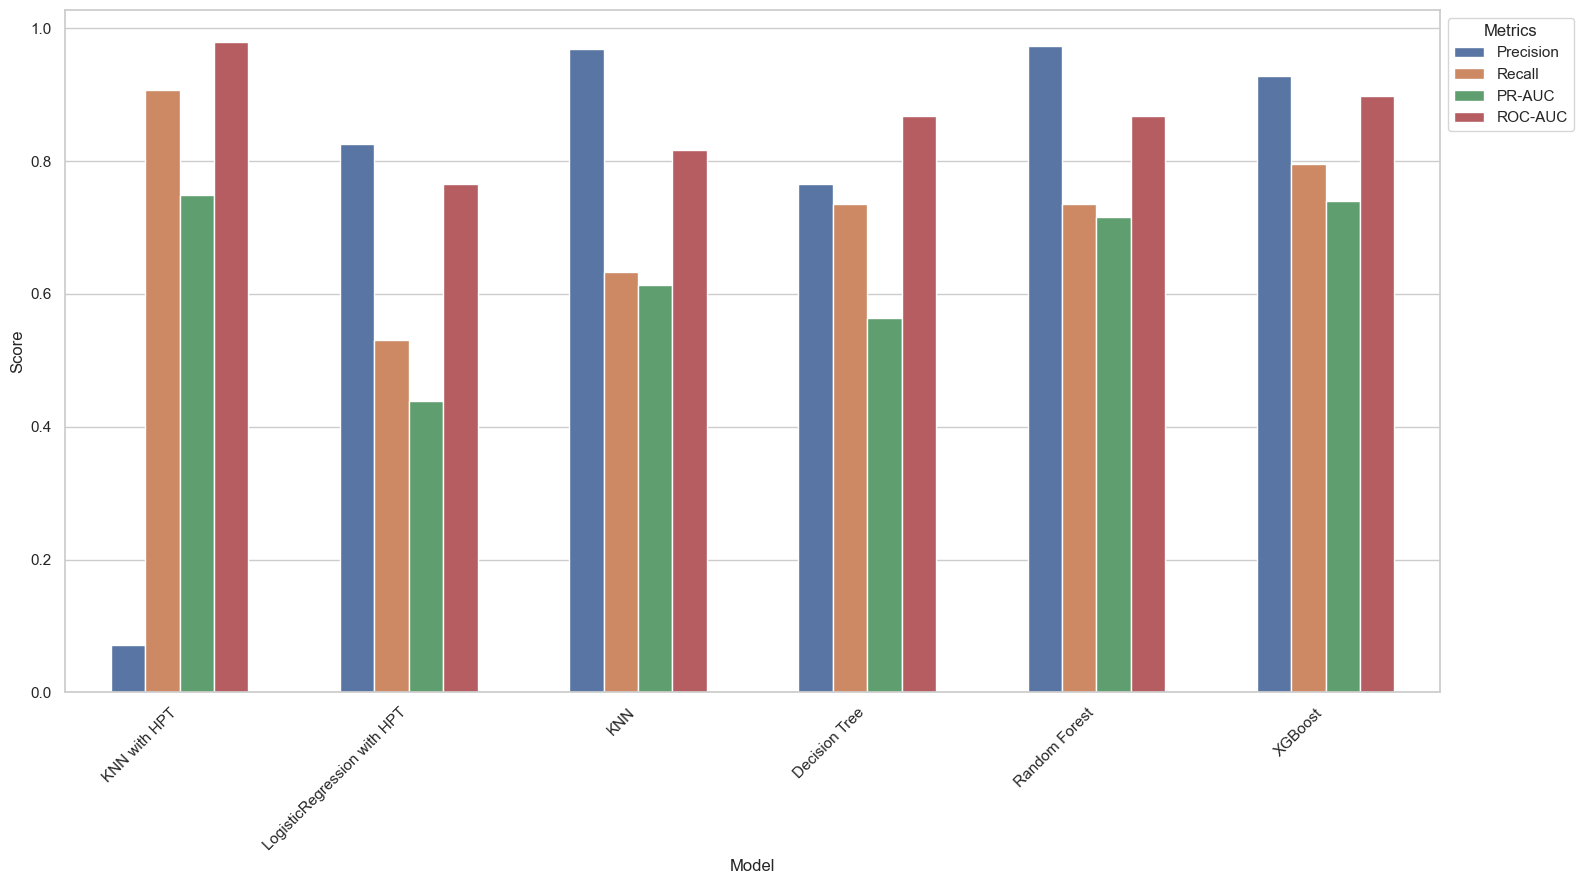

In [115]:
# Plot metrics 

plot_metrics_df('deep')


#### Observations

In this project, the objective is to train a model that can detect fraudulent transactions. Hence, Recall in conjunction with precision becomes an utmost significant metric for model evaluation. Alongside, we are capturing Area under Precision-Recall curve that assists in model evaulation when datasets are imbalanced, like ours.

Precision: Helps to detect predicted frauds that are actual frauds
Recall: Helps to detect the actual frauds
ROC AUC: Helps to understand the model's ability to distinguish between actual frauds and non-frauds

There is another attribute under consideration is the speed of the model to train and predict. This is important because it can help us understand how much time our model takes to train and predict. This can be useful for optimizing the model's performance and for understanding how much time it takes to train and predict on new data.

Basis the above context and significant points, XGBoost model appears to have performed well. It is extremely fast and has the highest recall and PRAUC. 

In such a use case, it would be better to suspect slightly more transactions then missing out on actual frauds.

In [116]:
# Define a reusable function to train by tuning hyperparameters

def train_model_hpt(model, param_grid, X_train, y_train, X_test, y_test, name):
    # Start time computation
    start_time = time.time()

    # Initiate Randomized search cross validation instance with scoring method recall
    clf = RandomizedSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1 , verbose=3)
    
    # train the model
    clf.fit(X_train, y_train)

    # get best parameters
    best_params = clf.best_params_

    # Predict on test data
    y_pred = clf.predict(X_test)

    # assign performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    pr_auc_score = average_precision_score(y_test, y_pred)
    roc_auc_sc = roc_auc_score(y_test, y_pred)
    print(f"Model: {model}, Precision: {precision}, Recall: {recall}, PR-AUC Score: {pr_auc_score}, ROC-AUC Score: {roc_auc_sc}, Time Taken(s): {int(time.time()-start_time)}")
    
    return model, precision, recall, pr_auc_score, roc_auc_sc, int(time.time()-start_time), best_params

In [117]:
# set the hyperparameters for each algorithm

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto']
}
# train the decision tree model with hyperparater tuning

dt_param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# train the random forest model by hyperparameter tuning

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# train the XGBoost model by hyperparameter tuning

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}


In [118]:
# create a hashmap for models and their respective parameter grid for hyperparameter tuning and run the loop to train using each model
model_dict = {
    "KNN HPT" : [KNeighborsClassifier(), knn_param_grid],
    "Decision Tree HPT" : [DecisionTreeClassifier(random_state=RANDOM_STATE), dt_param_grid],
    "Random Forest HPT" : [RandomForestClassifier(random_state=RANDOM_STATE), rf_param_grid],
    "XGBoost HPT" : [XGBClassifier(random_state=RANDOM_STATE), xgb_param_grid]
}
for model_name, [model, param_grid] in model_dict.items():
    name, precision, recall, pr_auc_score, roc_auc_sc, timetaken, best_params = train_model_hpt(model, param_grid, X_train, y_train, X_test, y_test, model_name)
    # emit the metrics into dataframe
    metrics_df = capture_model_performance_metrics(
                metrics_df,
                model_name,
                precision,
                recall,
                pr_auc_score,
                roc_auc_sc,
                timetaken,
                best_params
            )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.570 total time=  30.9s
[CV 5/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.709 total time=  30.9s
[CV 1/5] END algorithm=auto, n_neighbors=9, weights=uniform;, score=0.641 total time=  30.9s
[CV 3/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.633 total time=  30.9s
[CV 4/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.709 total time=  31.1s
[CV 2/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.620 total time=  31.2s
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.570 total time=  31.4s
[CV 1/5] END algorithm=auto, n_neighbors=3, weights=distance;, score=0.756 total time=  31.5s
[CV 1/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.641 total time=  31.5s
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.570 total time=  32

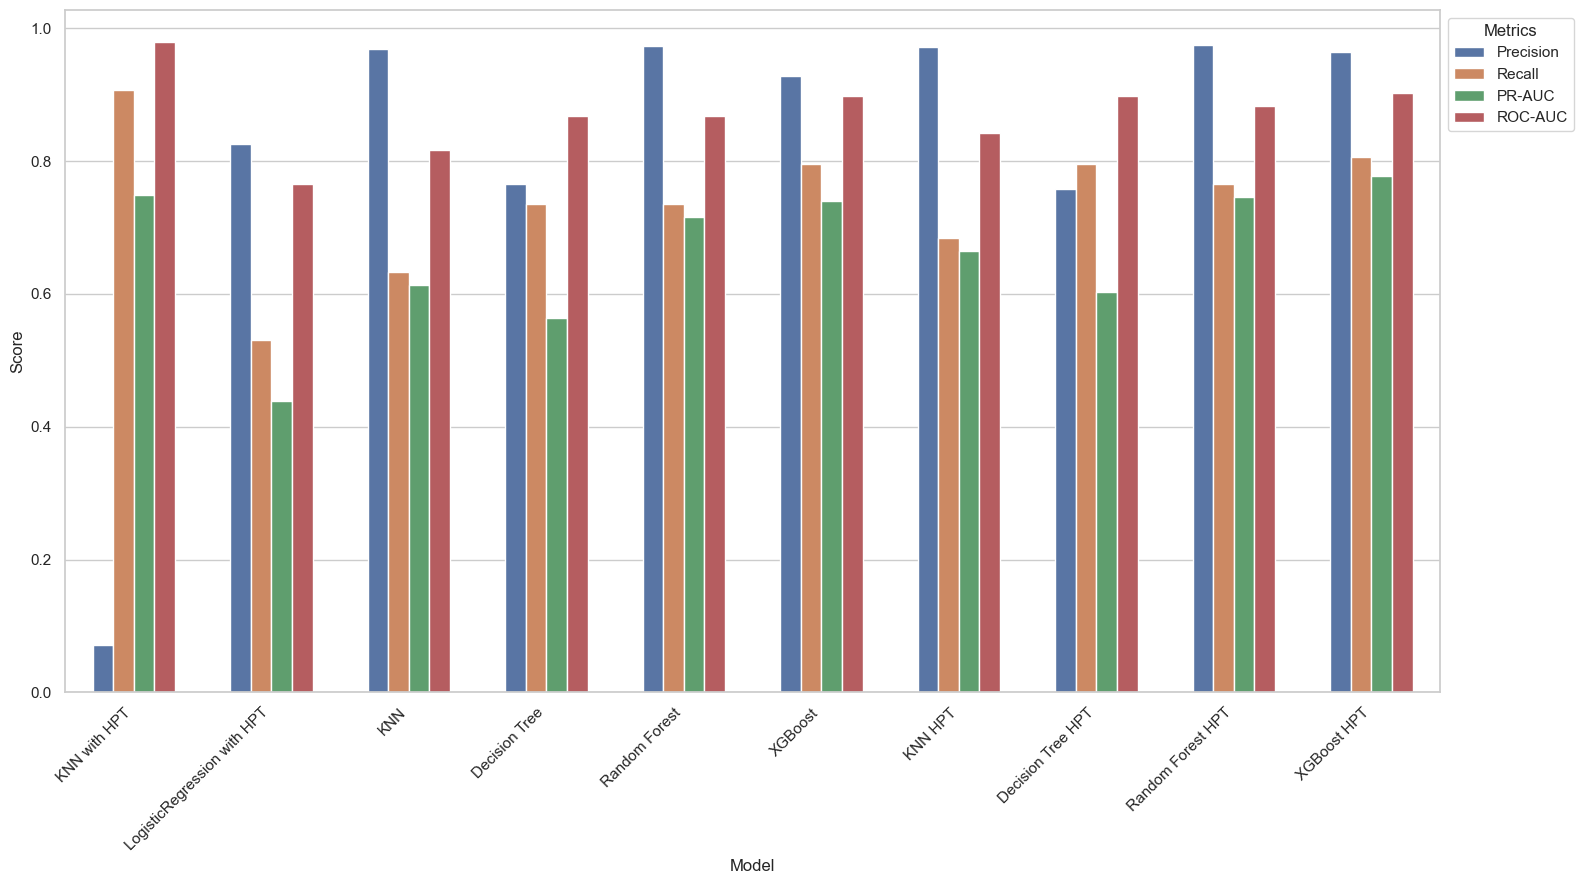

In [119]:
plot_metrics_df('deep')

In [120]:
# Get the optimum parameters in a variable 

optimum_params = metrics_df[metrics_df['Model'] == 'XGBoost HPT']['Parameters'].values[0]

In [121]:
clf = XGBClassifier(**optimum_params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))  #print the evaluation score on the X_test by choosing the best evaluation metric

0.9996137776061234


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 17


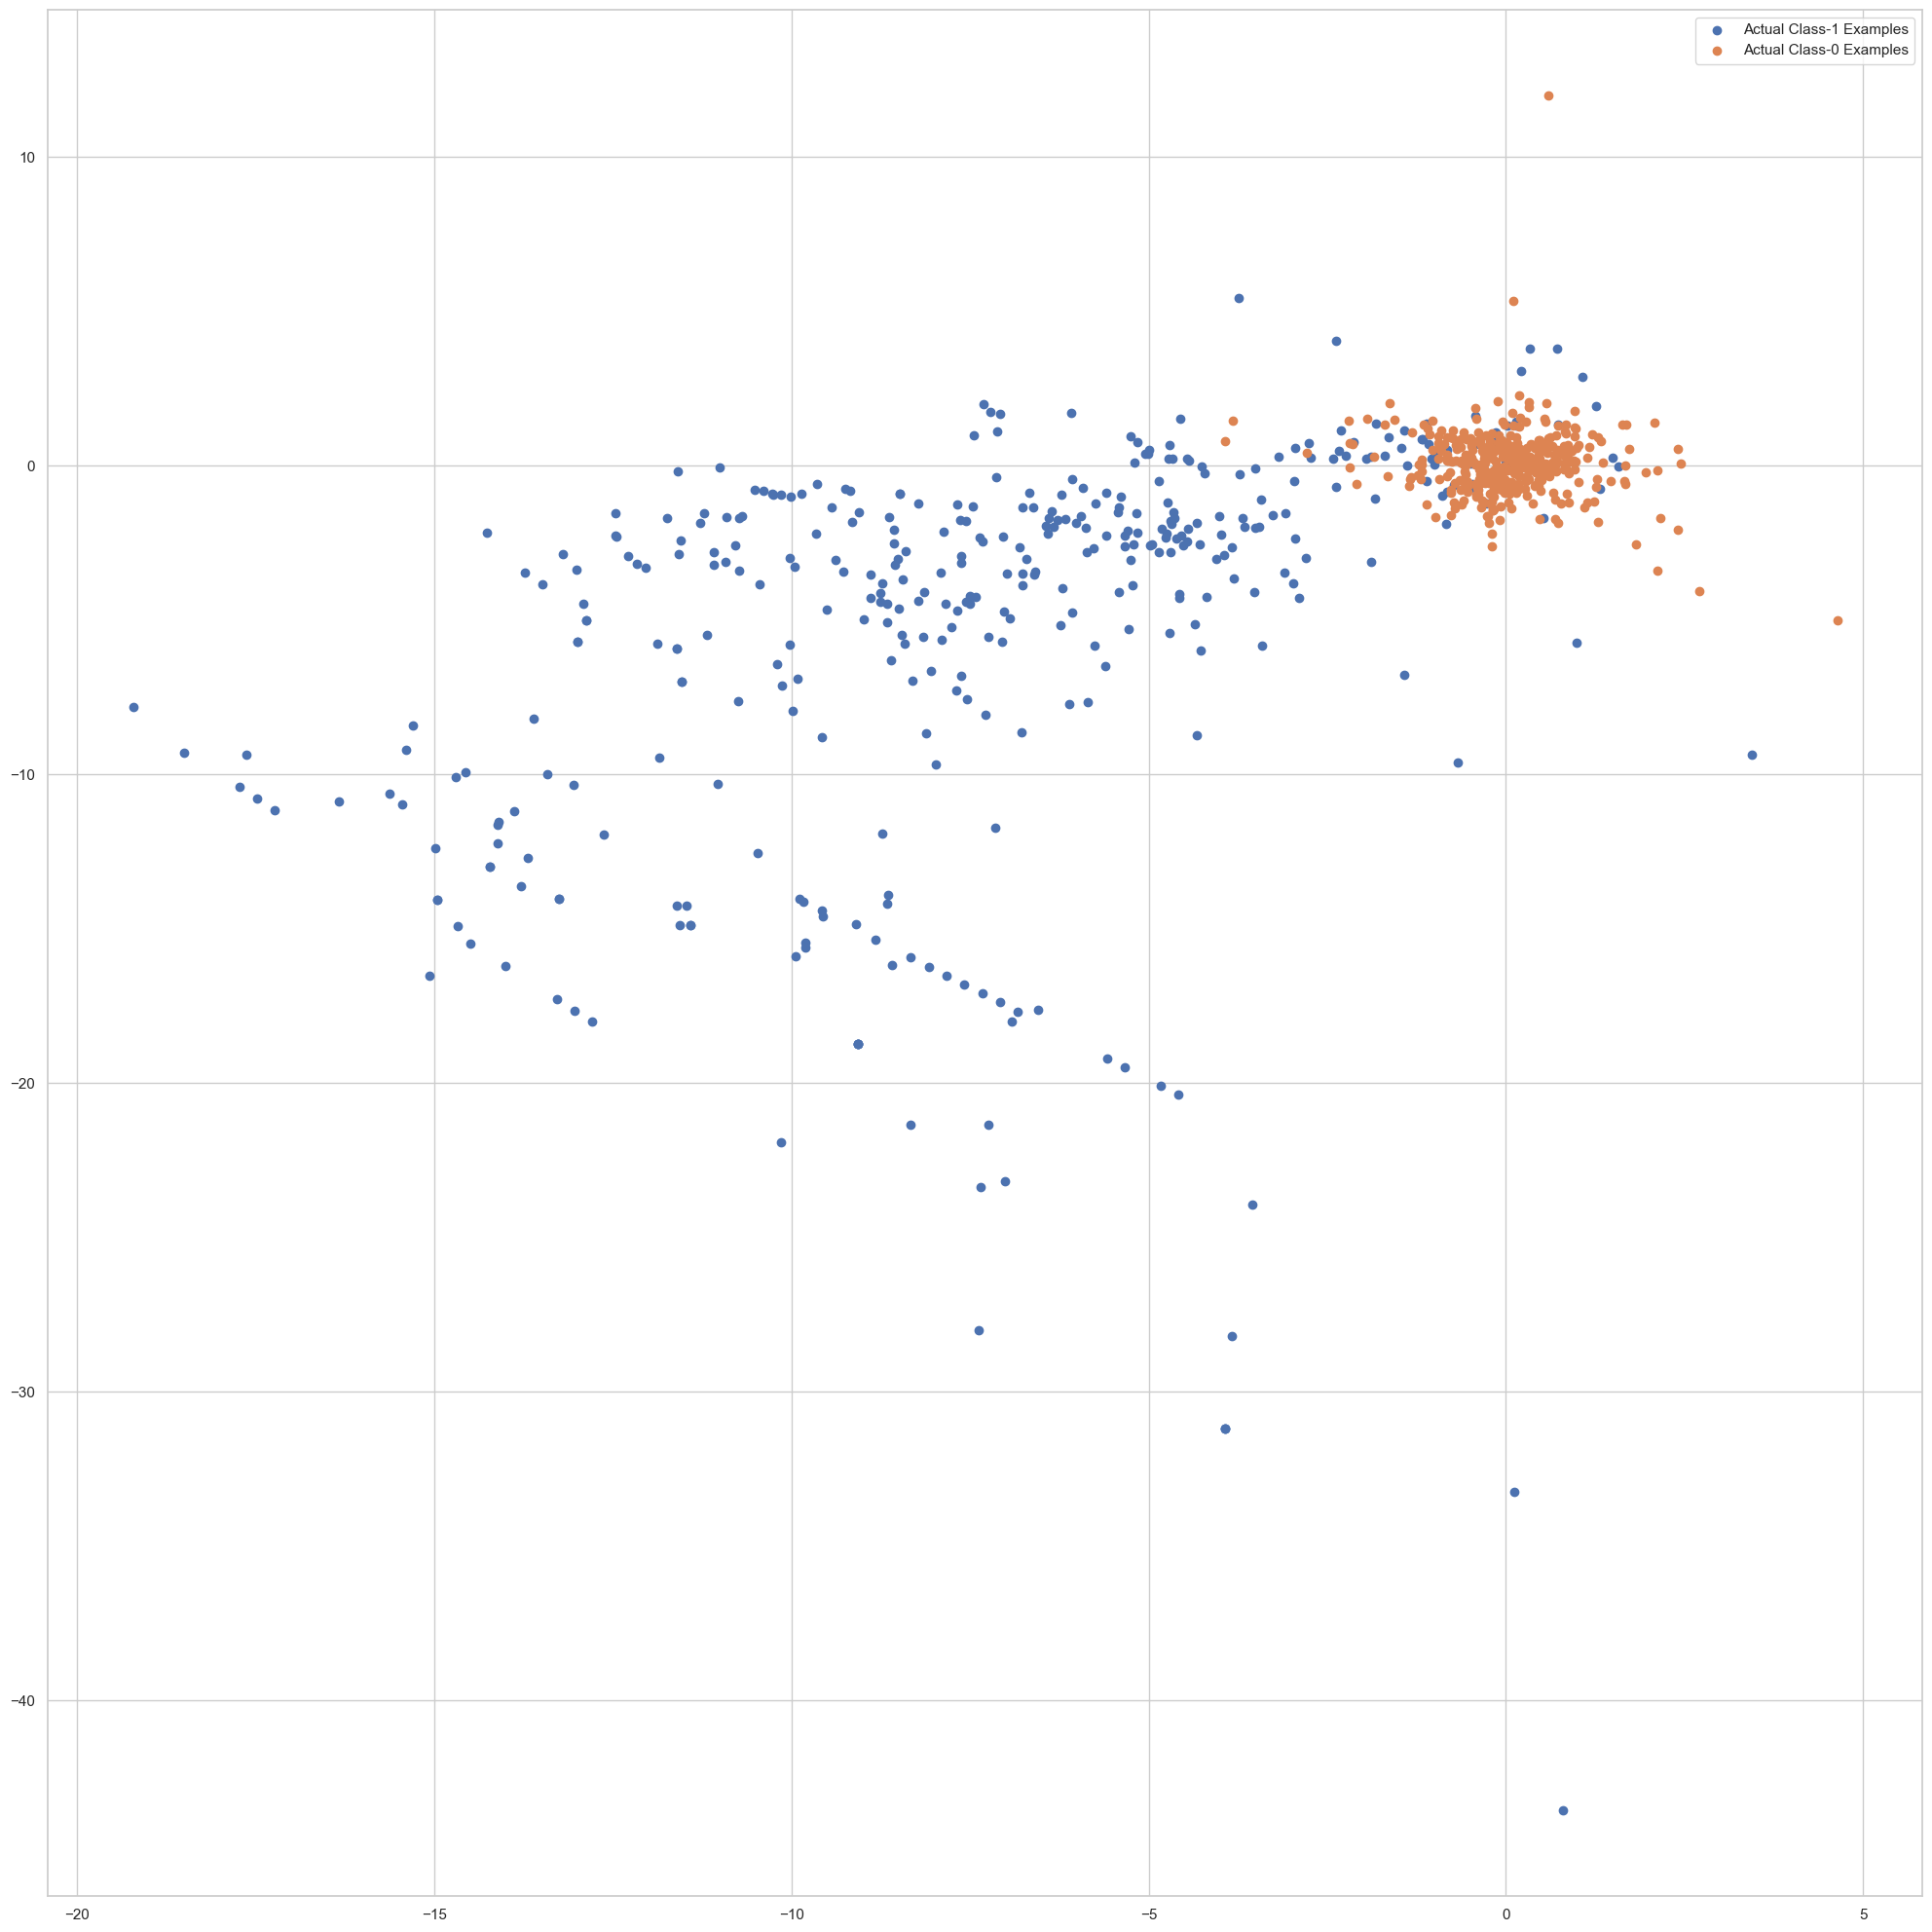

In [122]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.tight_layout()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [123]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.01, 0.1, 1, 2, 3]  #--> list of values
cv_num = [5, 10]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [124]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_cv, y_train_cv = ros.fit_resample(X_train, y_train)
X_test_cv = X_test.to_numpy()
y_test_cv = y_test.to_numpy()

#perform hyperparameter tuning
model = linear_model.LogisticRegression(random_state=0, class_weight='balanced')
model.fit(X_train_cv, y_train_cv)
y_pred = model.predict(X_test_cv)
# print(classification_report(y_test_cv, y_pred))

#print the evaluation result by choosing a evaluation metric
print("Precision: ", precision_score(y_test_cv, y_pred))
print("Recall: ", recall_score(y_test_cv, y_pred))
print("PR-AUC Score: ", average_precision_score(y_test_cv, y_pred))
print("ROC-AUC Score: ", roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters
print("The optimum value of hyperparameters are: ", model.get_params())


Precision:  0.0628053035589672
Recall:  0.9183673469387755
PR-AUC Score:  0.05781878450999737
ROC-AUC Score:  0.9473747961480596
The optimum value of hyperparameters are:  {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [125]:
# perform cross validation on knn, decision tree, random forest and xgboost

model_dict = {
    "KNN HPT ROS" : [KNeighborsClassifier(), knn_param_grid],
    "Decision Tree HPT ROS" : [DecisionTreeClassifier(random_state=RANDOM_STATE), dt_param_grid],
    "Random Forest HPT ROS" : [RandomForestClassifier(random_state=RANDOM_STATE), rf_param_grid],
    "XGBoost HPT ROS" : [XGBClassifier(random_state=RANDOM_STATE), xgb_param_grid]
}

for model_name, [model, param_grid] in model_dict.items():
    name, precision, recall, pr_auc_score, roc_auc_sc, timetaken, best_params = train_model_hpt(model, param_grid, X_train_cv, y_train_cv, X_test_cv, y_test_cv, model_name)
    # emit the metrics into dataframe
    metrics_df = capture_model_performance_metrics(
                metrics_df,
                model_name,
                precision,
                recall,
                pr_auc_score,
                roc_auc_sc,
                timetaken,
                best_params
            )


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=11, weights=distance;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=1.000 total time= 2.0min
[CV 3/5] END algorithm=auto, n_neighbors=11, weights=distance;, score=1.000 total time= 2.0min
[CV 3/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=1.000 total time= 2.0min
[CV 2/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=1.000 total time= 2.0min
[CV 2/5] END algorithm=auto, n_neighbors=11, weights=distance;, score=1.000 total time= 2.0min
[CV 5/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=1.000 total time= 2.0min
[CV 5/5] END algorithm=auto, n_neighbors=11, weights=distance;, score=1.000 total time= 2.0

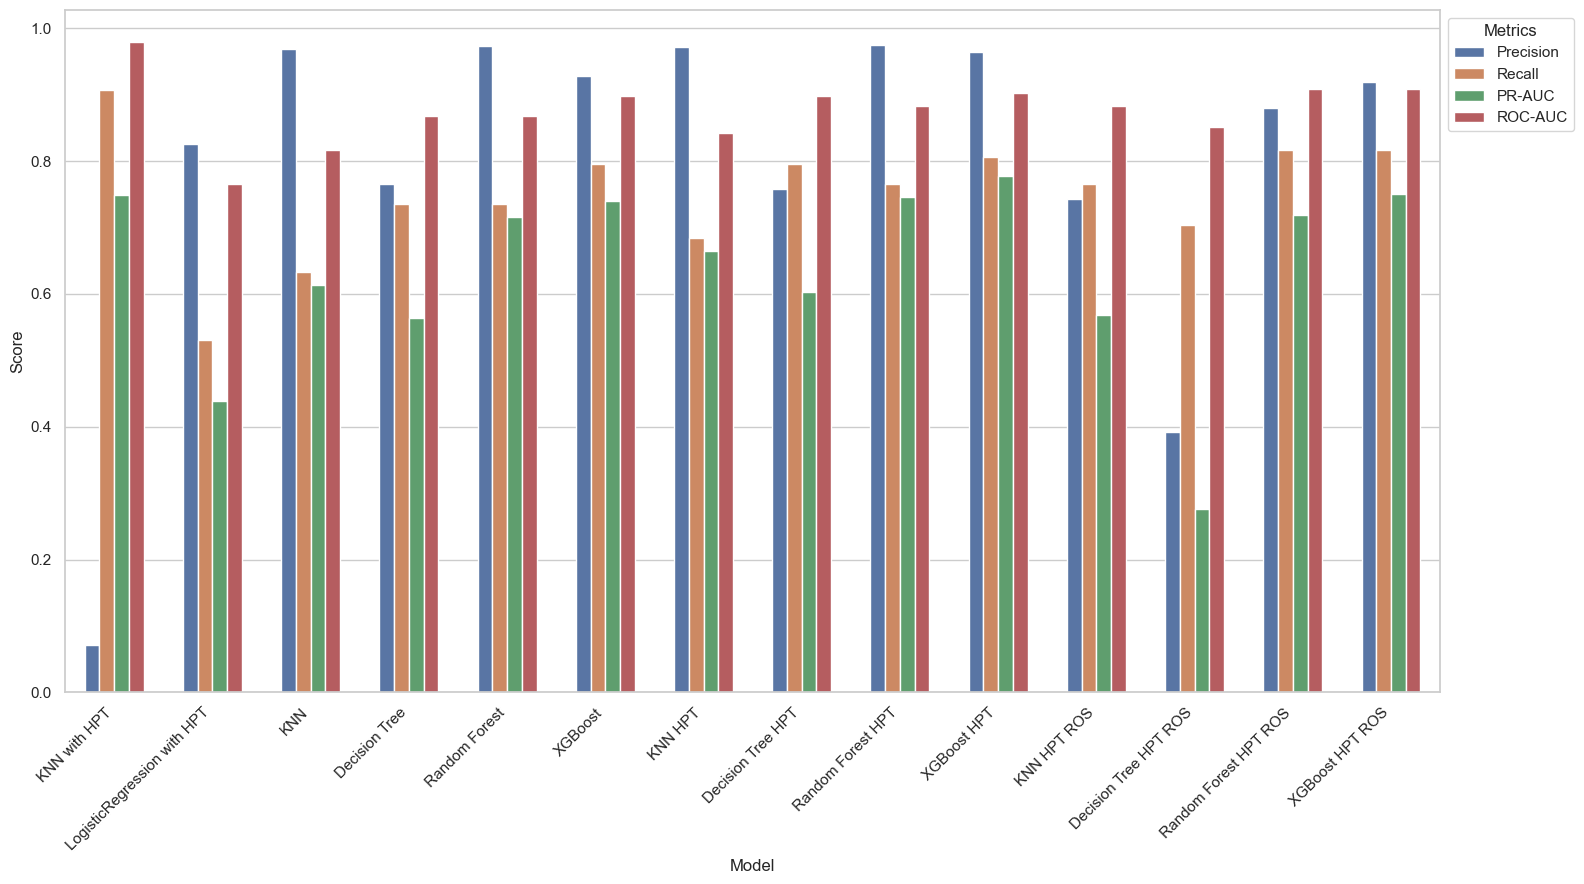

In [126]:
plot_metrics_df('deep')

### Print the class distribution after applying SMOTE 

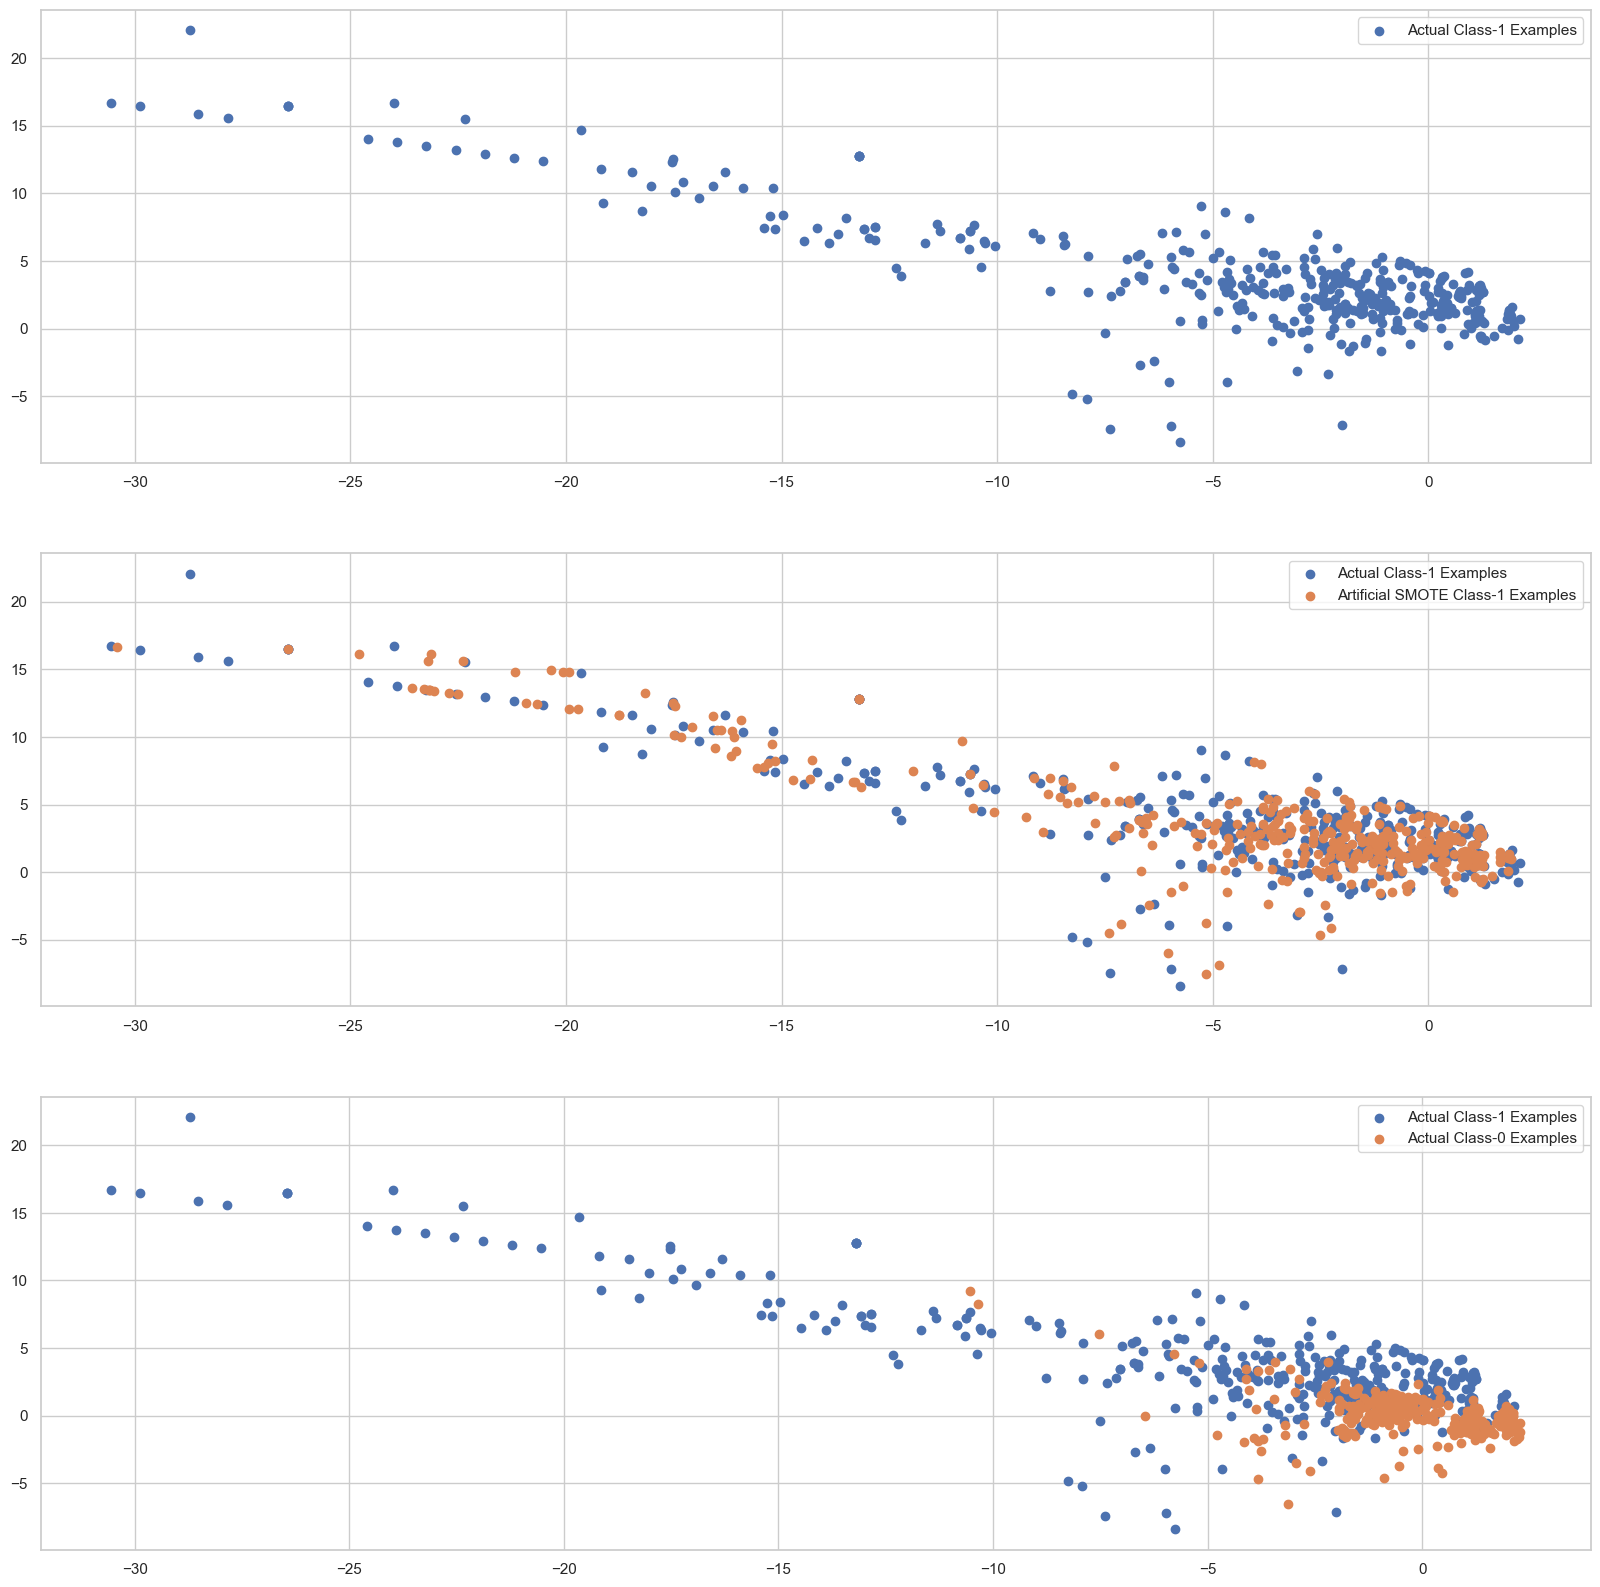

In [127]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [128]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

model_dict = {
    "KNN HPT SMOTE" : [KNeighborsClassifier(), knn_param_grid],
    "Decision Tree HPT SMOTE" : [DecisionTreeClassifier(random_state=RANDOM_STATE), dt_param_grid],
    "Random Forest HPT SMOTE" : [RandomForestClassifier(random_state=RANDOM_STATE), rf_param_grid],
    "XGBoost HPT SMOTE" : [XGBClassifier(random_state=RANDOM_STATE), xgb_param_grid]
}

for model_name, [model, param_grid] in model_dict.items():
    name, precision, recall, pr_auc_score,roc_auc_sc, timetaken, best_params = train_model_hpt(model, param_grid, X_train_smote, y_train_smote, X_test_cv, y_test_cv, model_name)
    # emit the metrics into dataframe
    metrics_df = capture_model_performance_metrics(
                metrics_df,
                model_name,
                precision,
                recall,
                pr_auc_score,
                roc_auc_sc,
                timetaken,
                best_params
            )


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=1.000 total time= 2.0min
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=1.000 total time= 2.0min
[CV 3/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=1.000 total time= 2.0min
[CV 4/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=1.000 total time= 2.0min
[CV 2/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=3, weights=uniform;, score=1.000 total time= 2.0min
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=11, weights=distance;, score=1.000 total time= 2.0min
[CV 1/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=1.000 total time= 2.0min
[CV 5/5] END algorithm=auto, n_neighbors=15, weights=distance;, score=1.000 total time= 2.0m

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

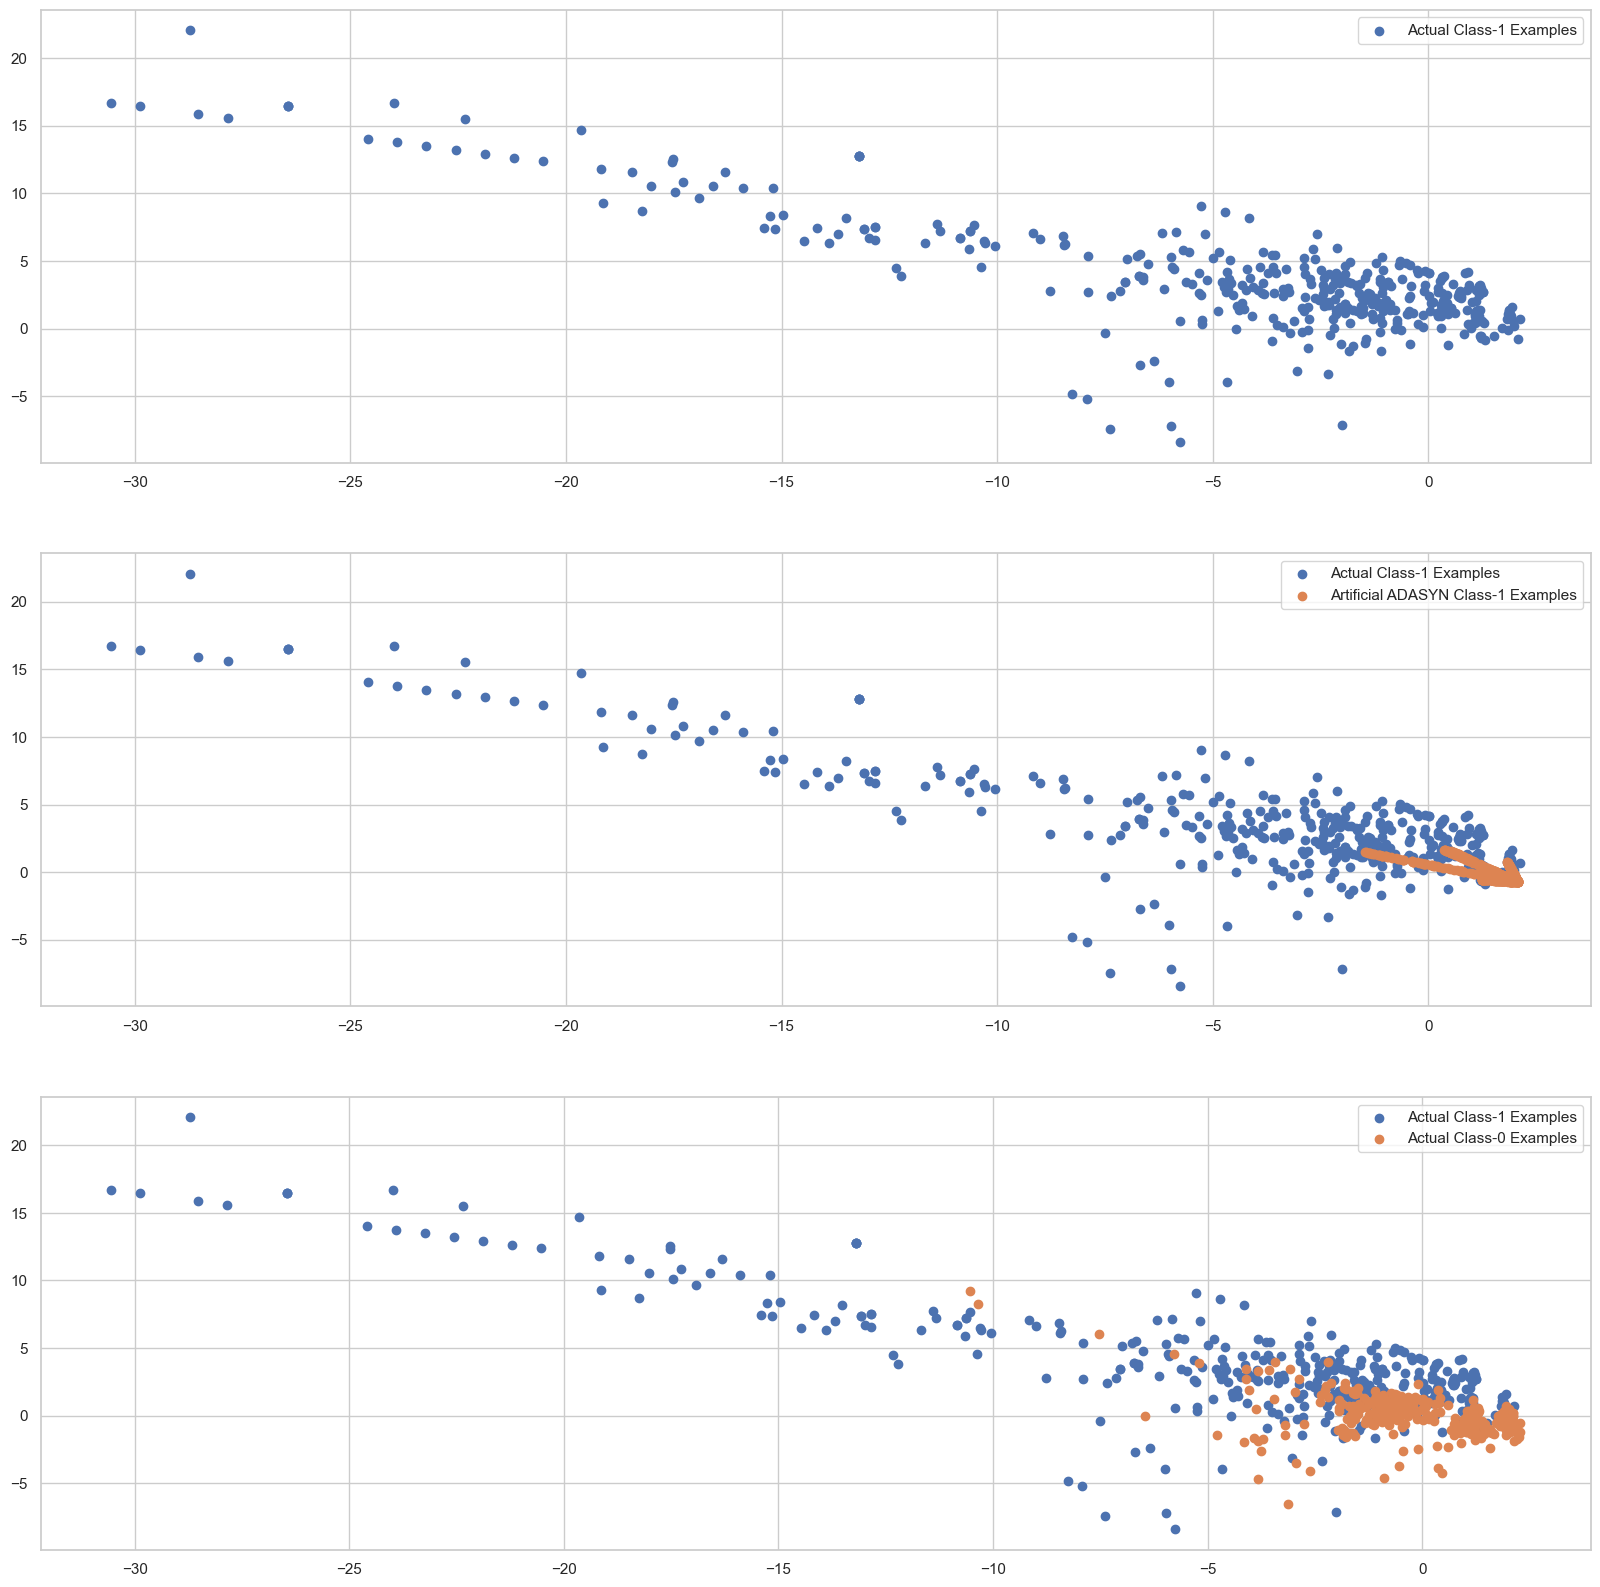

In [129]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [130]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


model_dict = {
    "KNN HPT ADASYN" : [KNeighborsClassifier(), knn_param_grid],
    "Decision Tree HPT ADASYN" : [DecisionTreeClassifier(random_state=RANDOM_STATE), dt_param_grid],
    "Random Forest HPT ADASYN" : [RandomForestClassifier(random_state=RANDOM_STATE), rf_param_grid],
    "XGBoost HPT ADASYN" : [XGBClassifier(random_state=RANDOM_STATE), xgb_param_grid]
}

for model_name, [model, param_grid] in model_dict.items():
    name, precision, recall, pr_auc_score, roc_auc_sc, timetaken, best_params = train_model_hpt(model, param_grid, X_train_adasyn, y_train_adasyn, X_test_cv, y_test_cv, model_name)
    # emit the metrics into dataframe
    metrics_df = capture_model_performance_metrics(
                metrics_df,
                model_name,
                precision,
                recall,
                pr_auc_score,
                roc_auc_sc,
                timetaken,
                best_params
            )


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.971 total time= 1.7min
[CV 1/5] END algorithm=auto, n_neighbors=7, weights=uniform;, score=0.936 total time= 1.7min
[CV 2/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.973 total time= 1.7min
[CV 4/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.982 total time= 1.7min
[CV 1/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.938 total time= 1.7min
[CV 3/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.960 total time= 1.7min
[CV 3/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.962 total time= 1.7min
[CV 4/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.983 total time= 1.7min
[CV 5/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.968 total time= 1.7min
[CV 1/5] END algorithm=auto, n_neighbors=15, weights=uniform;, score=0.942 total time= 1.8min


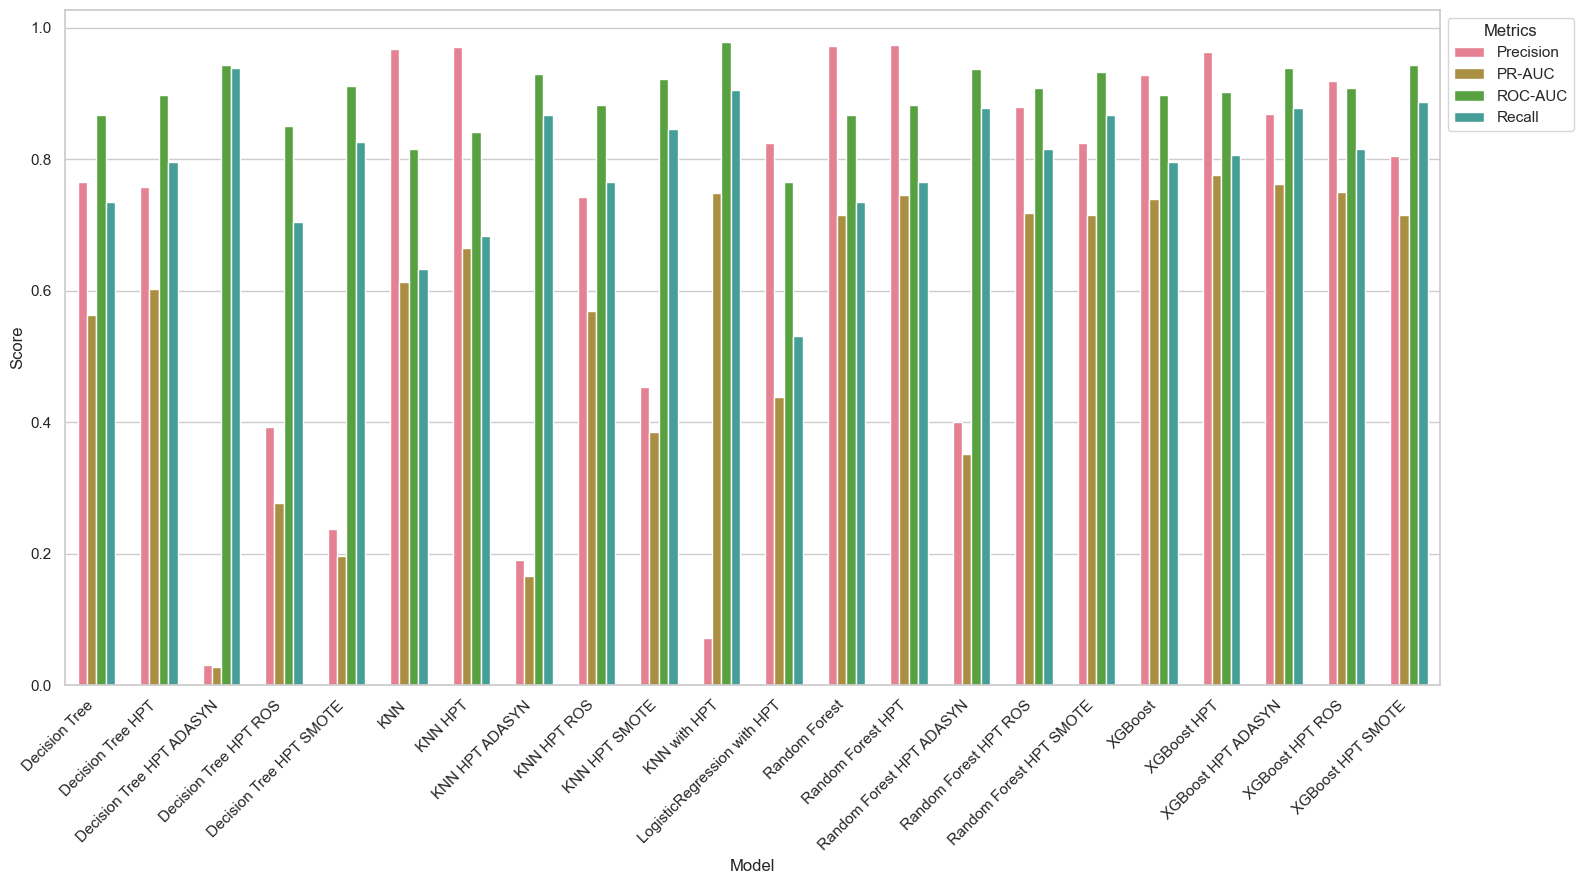

In [176]:
plot_metrics_df('husl')

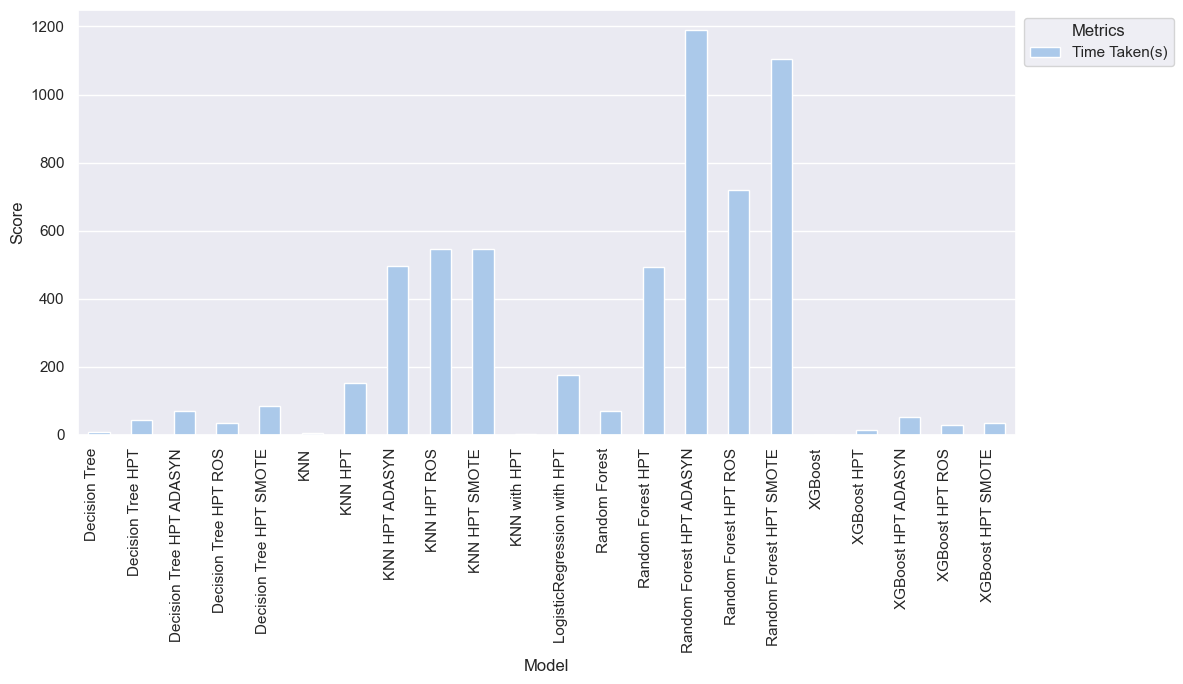

In [166]:
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.set_palette('pastel')

# Melt the dataframe to long format
metrics_melted = metrics_df.melt(id_vars=['Model'], value_vars=['Time Taken(s)'], var_name='Metric', value_name='Score').sort_values('Model')

# Create grouped bar plot
ax = sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', width=0.5)

plt.xticks(rotation=90, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
metrics_df.to_csv('credit_card_fraud_detection_metrics.csv', index=False)

,Model,Precision,Recall,PR-AUC,ROC-AUC,Time Taken(s),Parameters
0,KNN with HPT,0.071258,0.906167,0.748130,0.978426,1.225626,"{'C': 0.001, 'class_weight': 'balanced'}"
1,LogisticRegression with HPT,0.825397,0.530612,0.438773,0.765209,174.532533,"[{'penalty': ['l1', 'l2'], 'C': [0.1, 0.316227..."
2,KNN,0.968750,0.632653,0.613515,0.816309,5.000000,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
3,Decision Tree,0.765957,0.734694,0.563201,0.867153,7.000000,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',..."
4,Random Forest,0.972973,0.734694,0.715294,0.867329,69.000000,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
5,XGBoost,0.928571,0.795918,0.739418,0.897906,0.000000,"{'objective': 'binary:logistic', 'base_score':..."
6,KNN HPT,0.971014,0.683673,0.664401,0.841819,153.000000,"{'weights': 'distance', 'n_neighbors': 3, 'alg..."
7,Decision Tree HPT,0.757282,0.795918,0.603085,0.897739,44.000000,"{'min_samples_split': 5, 'min_samples_leaf': 1..."
8,Random Forest HPT,0.974026,0.765306,0.745832,0.882635,492.000000,"{'n_estimators': 100, 'min_samples_split': 2, ..."
9,XGBoost HPT,0.963415,0.806122,0.776964,0.903035,15.000000,"{'subsample': 0.7, 'n_estimators': 200, 'max_d..."


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [168]:
metrics_df[metrics_df['Model'] == 'XGBoost HPT SMOTE']['Parameters'].values[0]

{'subsample': 1.0,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [169]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(**metrics_df[metrics_df['Model'] == 'XGBoost HPT ADASYN']['Parameters'].values[0])  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
print (clf.score(X_test, y_test))  #print the evaluation score on the X_test by choosing the best evaluation metric

0.9995259997893332


### Observation

- The model is performing better on the test dataset than the train dataset
- XGBoost model with adaptive sampling method is performing better than the other models

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


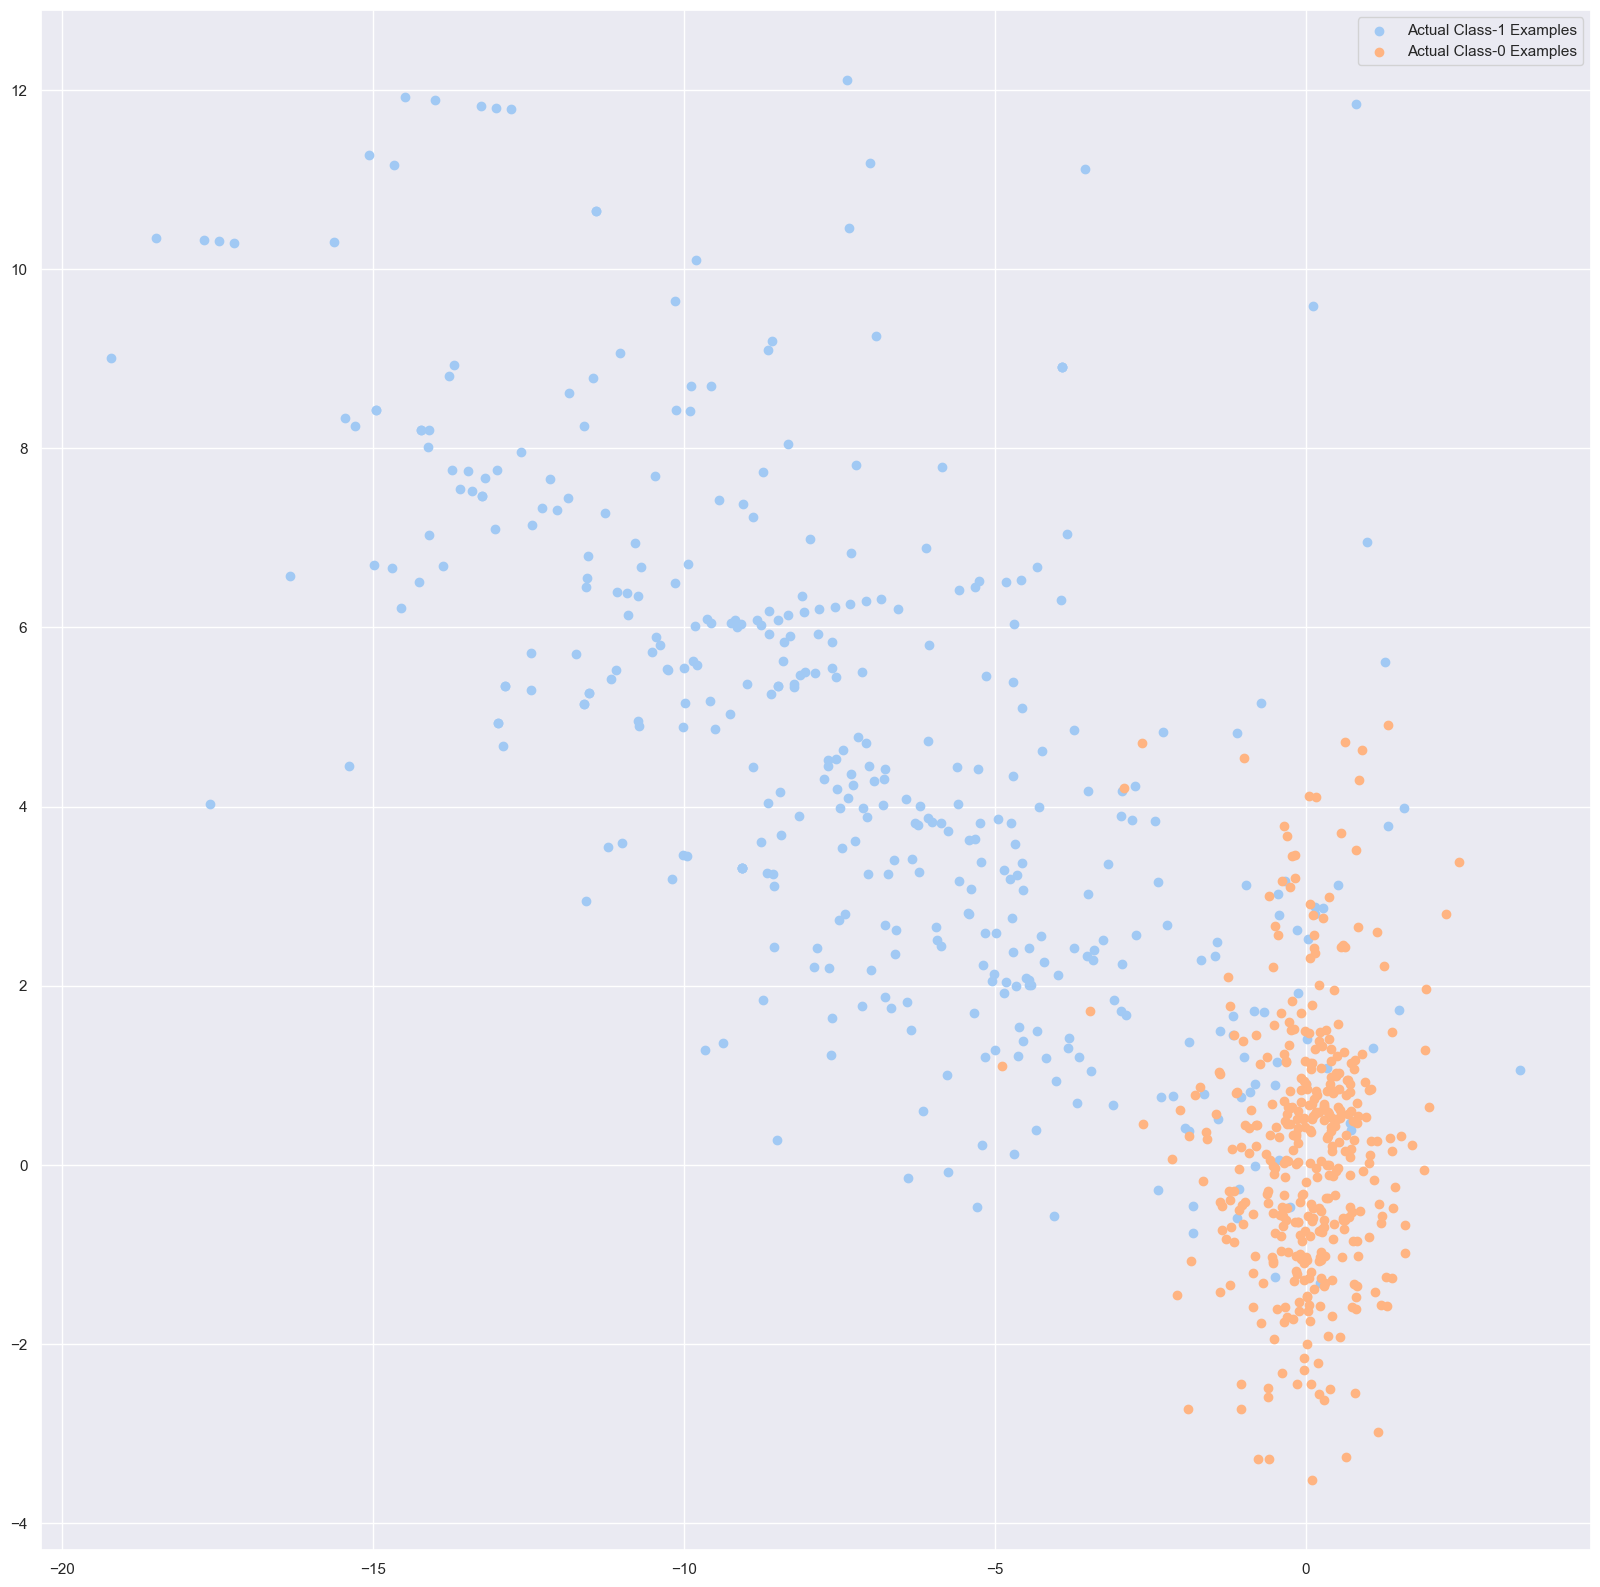

In [170]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [171]:
#### Print the FPR,TPR & select the best threshold from the roc curve
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

print(f"fpr: {fpr} \n tpr: {tpr} \n thresholds: {thresholds} \n auc: {auc}")

fpr: [0.         0.         0.         ... 0.99882175 0.99885692 1.        ] 
 tpr: [0.         0.02040816 0.09183673 ... 1.         1.         1.        ] 
 thresholds: [          inf 9.9999988e-01 9.9999785e-01 ... 3.4524412e-09 3.4378138e-09
 1.1957676e-09] 
 auc: 0.9954427606720797


In [172]:
y_pred = clf.predict(X_test)

In [173]:
print('Train auc =', metrics.roc_auc_score(y_test, y_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(f"Threshold = {threshold}")

Train auc = 0.9954427606720797
Threshold = 0.0005213430267758667


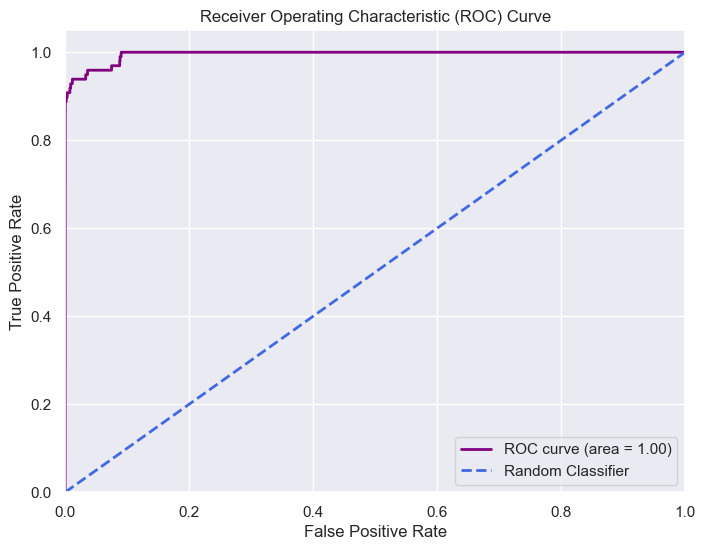

In [174]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='royalblue', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


---

## Conclusion Summary

The project evaluated multiple machine learning models for fraudulent transaction detection using various resampling techniques (SMOTE, ADASYN, ROS) and hyperparameter tuning (HPT). Performance was assessed using Precision, Recall, PR-AUC, ROC-AUC, and computation time.

#### Key Observations

- XGBoost with HPT and SMOTE achieved the highest ROC-AUC (0.934693) and strong PR-AUC (0.715329), indicating very good discrimination capability.
- Random Forest with HPT and SMOTE also performed exceptionally well with ROC-AUC (0.933515) and balanced precision-recall trade-off.
- XGBoost HPT (without resampling) delivered the best overall balance of Precision (0.963415), Recall (0.802162), and PR-AUC (0.776964) with minimal computation time (15s).
- Models using ADASYN generally showed lower precision and PR-AUC, despite high recall, making them less suitable for fraud detection where false positives are costly.
- KNN-based models had inconsistent performance and high computation time under resampling, making them less practical.

#### Best Model
Considering ROC-AUC, PR-AUC, and efficiency:

- XGBoost with HPT + SMOTE is the best model for its balanced performance for time and high recall. High recall would ensure that fraudulent transactions are detected with minimal false positives.
- Random Forest with HPT + SMOTE is the second best model for its high recall and balanced precision-recall trade-off.
- XGBoost with HPT (no resampling) a strong alternative.

#### Deviations
- During model development, we explored the possibility of using the Support Vector Machine (SVM) algorithm. However, this approach was not pursued further due to significant computational constraints. Initial attempts at building an SVM model proved highly time-inefficient, making it impractical within the available resources and timelines. Consequently, SVM was excluded from the final set of evaluated models.

#### Future Work
- To further enhance the performance and robustness of fraudulent transaction detection, the following improvements can be considered:
    - Explore other algorithms like deep learning techniques
    - Explore setting up a realtime pipeline for transaction identification
    - Explore feature engineering techniques
---